In [18]:
import os
import sys
sys.path.append("..")  # add top folder to path

from pathlib import Path

import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

from tinymolecule.utils.docking import generate_logs_table

# Data loading

In [25]:
BASE_DIR = Path("../data/pdb_out")

logs_ccr5 = generate_logs_table(BASE_DIR / "valid_sample_1e5" / "logs")
logs_ccr2 = generate_logs_table(BASE_DIR / "valid_sample_1e5_ccr2" / "logs")

total_molecules = len(logs_ccr5)
logs_ccr5.head()  # preview

,affin_kcal_mol-1_1,affin_kcal_mol-1_2,affin_kcal_mol-1_3,affin_kcal_mol-1_4,affin_kcal_mol-1_5,affin_kcal_mol-1_6,affin_kcal_mol-1_7,affin_kcal_mol-1_8,affin_kcal_mol-1_9,affin_kcal_mol-1_10,...,best_dist_rmsd_ub_1,best_dist_rmsd_ub_2,best_dist_rmsd_ub_3,best_dist_rmsd_ub_4,best_dist_rmsd_ub_5,best_dist_rmsd_ub_6,best_dist_rmsd_ub_7,best_dist_rmsd_ub_8,best_dist_rmsd_ub_9,best_dist_rmsd_ub_10
0,-8.9,-8.3,-8.3,-8.3,-8.2,-8.1,-8.0,-8.0,-7.8,-7.8,...,0.0,8.968,7.124,6.804,8.272,5.938,8.674,7.001,8.568,4.386
1,-9.7,-9.4,-9.2,-9.1,-8.5,-8.4,-8.1,-8.0,-8.0,-8.0,...,0.0,7.237,3.220,2.763,8.205,8.733,10.832,3.882,8.752,9.361
2,-10.9,-10.8,-10.5,-10.2,-10.1,-10.0,-9.9,-9.6,-9.3,-9.3,...,0.0,9.063,7.328,2.840,10.573,6.107,10.287,10.492,10.706,11.499
3,-8.6,-8.6,-8.5,-8.5,-8.5,-8.3,-8.3,-8.1,-8.1,-7.7,...,0.0,6.951,7.032,8.381,6.441,7.650,8.090,8.987,6.265,3.308
4,-5.3,-5.2,-5.1,-5.0,-5.0,-4.8,-4.7,-4.5,-4.5,-4.4,...,0.0,4.685,3.078,1.129,7.535,6.317,2.691,6.653,5.660,5.612


# Data validation
## Make sure that CCR5 best binding modes don't have any outliers

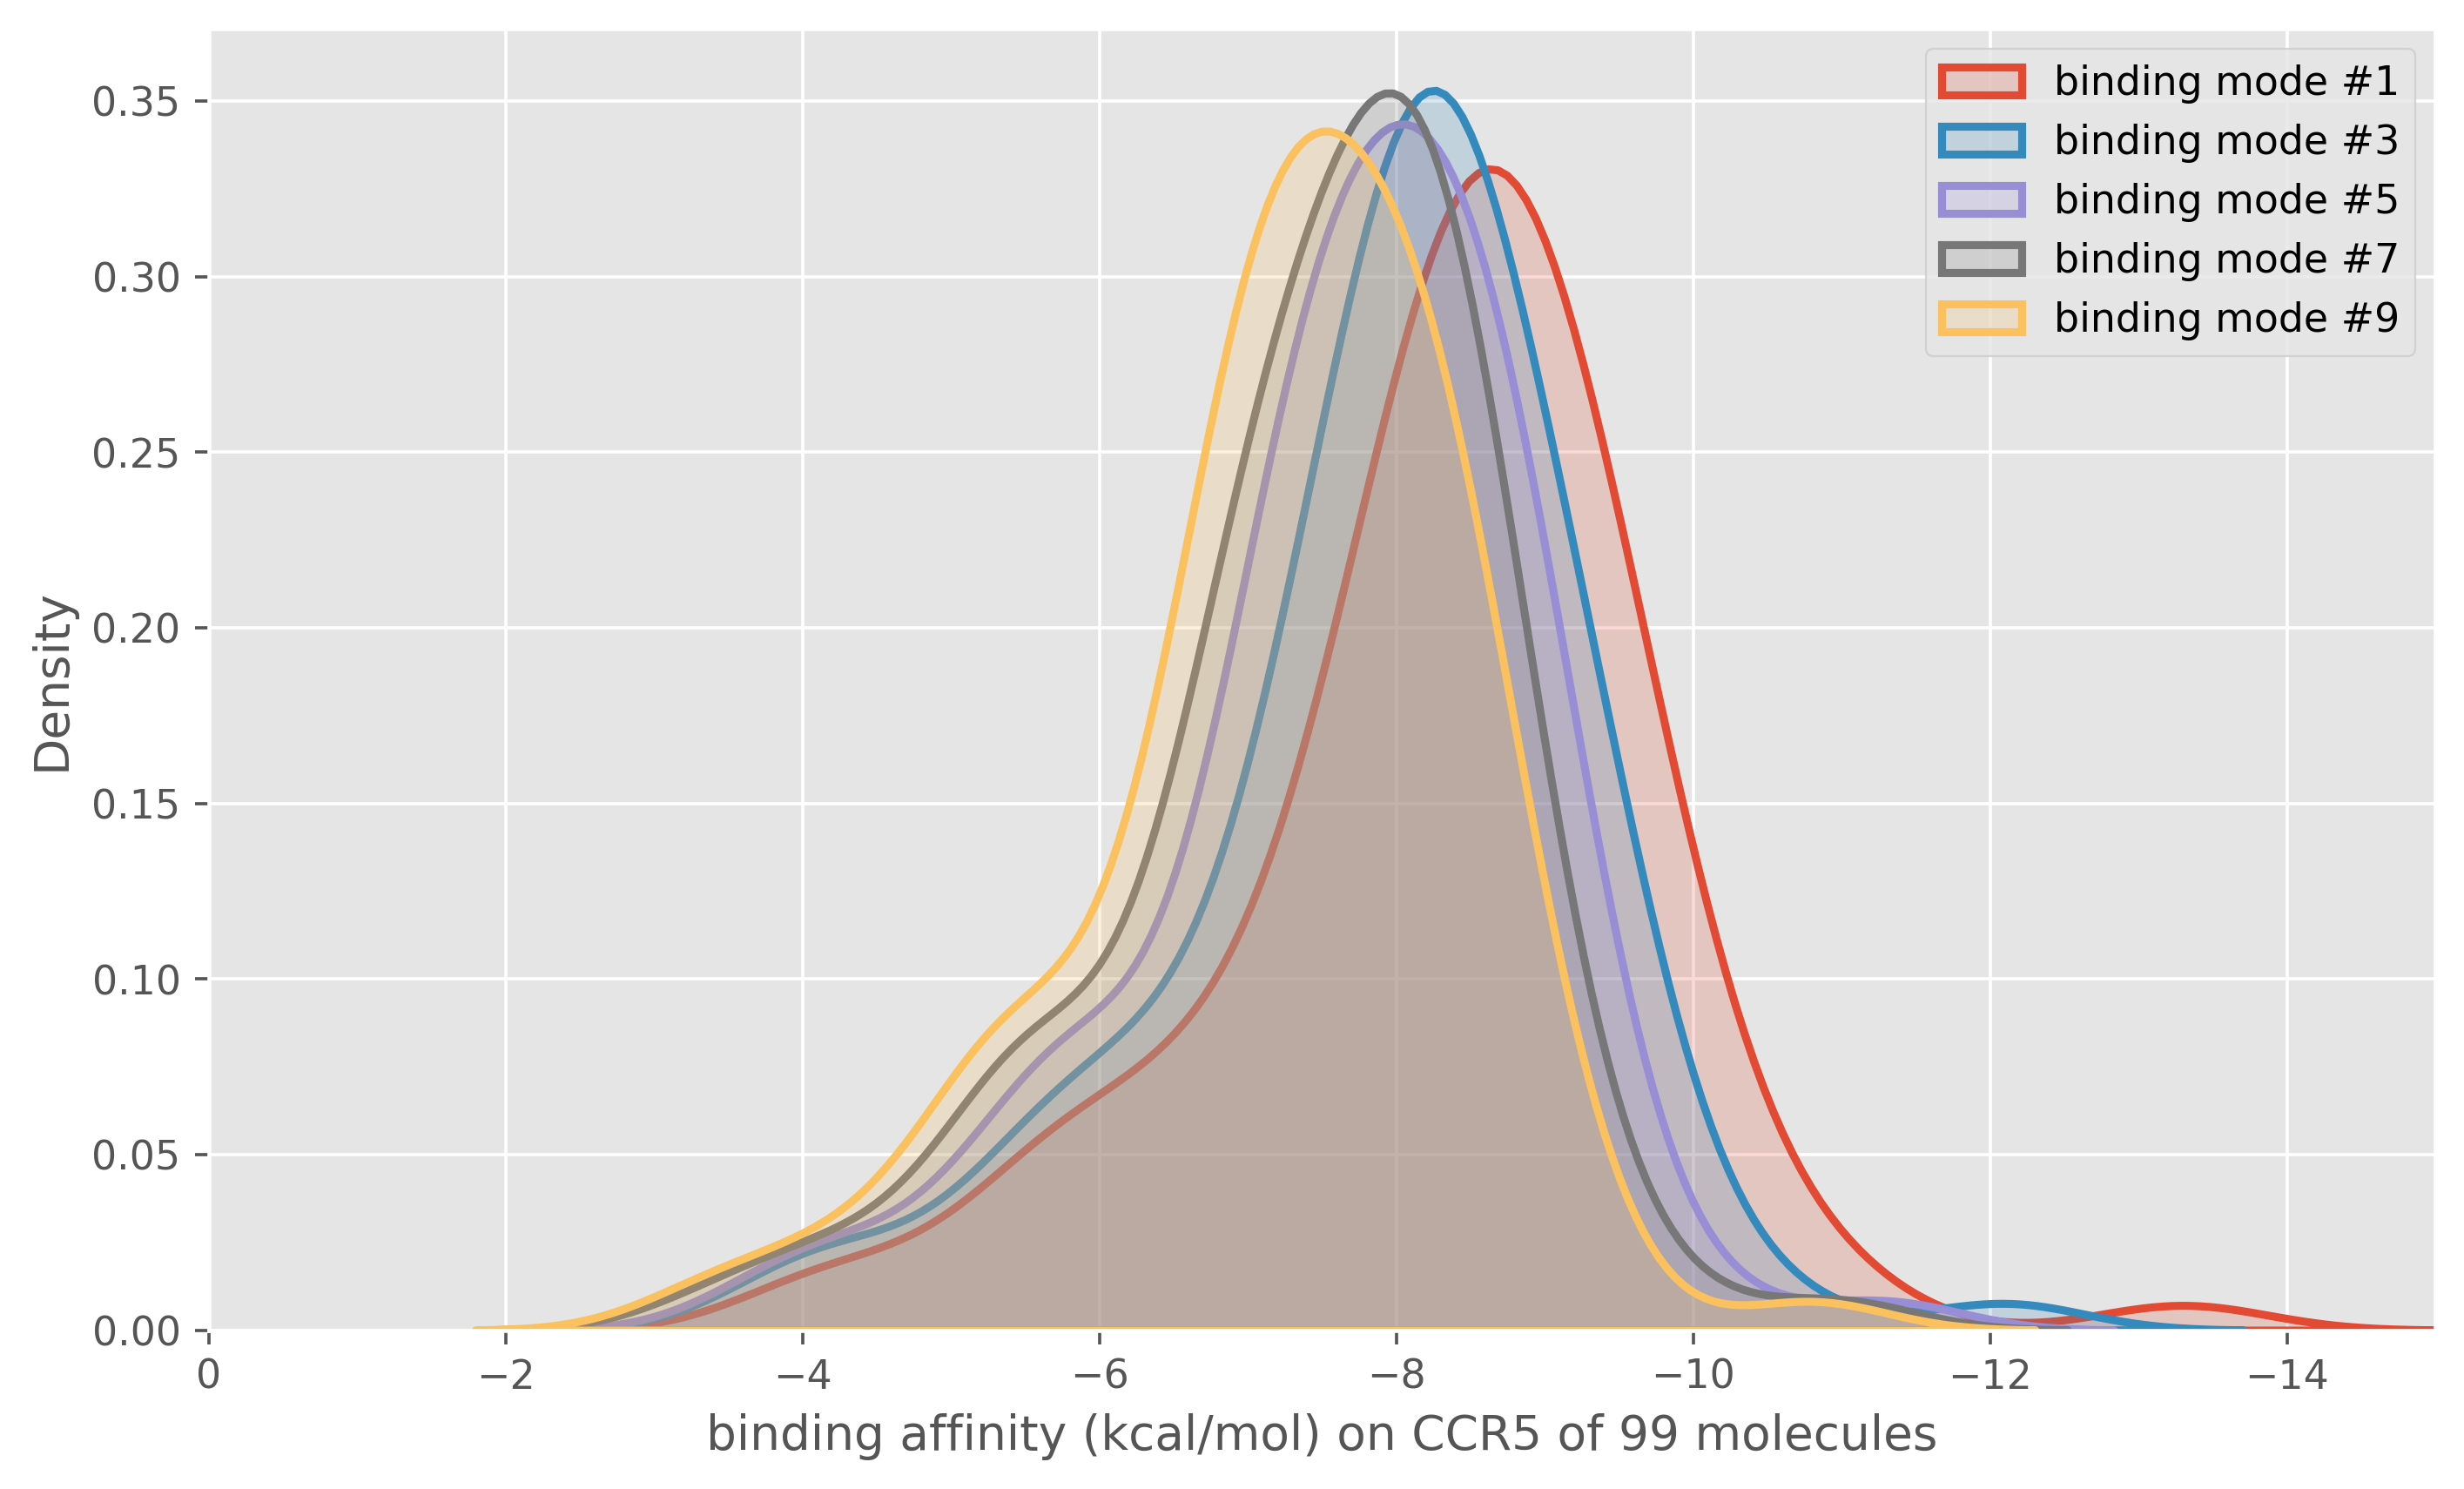

In [8]:
plt.figure(figsize=(10, 6), dpi=330)

sns.kdeplot(data=logs_ccr5["affin_kcal_mol-1_1"], linewidth=2, label="binding mode #1", fill=True, alpha=.2)
sns.kdeplot(data=logs_ccr5["affin_kcal_mol-1_3"], linewidth=2, label="binding mode #3", fill=True, alpha=.2)
sns.kdeplot(data=logs_ccr5["affin_kcal_mol-1_5"], linewidth=2, label="binding mode #5", fill=True, alpha=.2)
sns.kdeplot(data=logs_ccr5["affin_kcal_mol-1_7"], linewidth=2, label="binding mode #7", fill=True, alpha=.2)
sns.kdeplot(data=logs_ccr5["affin_kcal_mol-1_9"], linewidth=2, label="binding mode #9", fill=True, alpha=.2)

plt.xlim(0, -15)
plt.xlabel(f"binding affinity (kcal/mol) on CCR5 of {total_molecules} molecules")
plt.legend()
plt.show()

## CCR2 sanity check

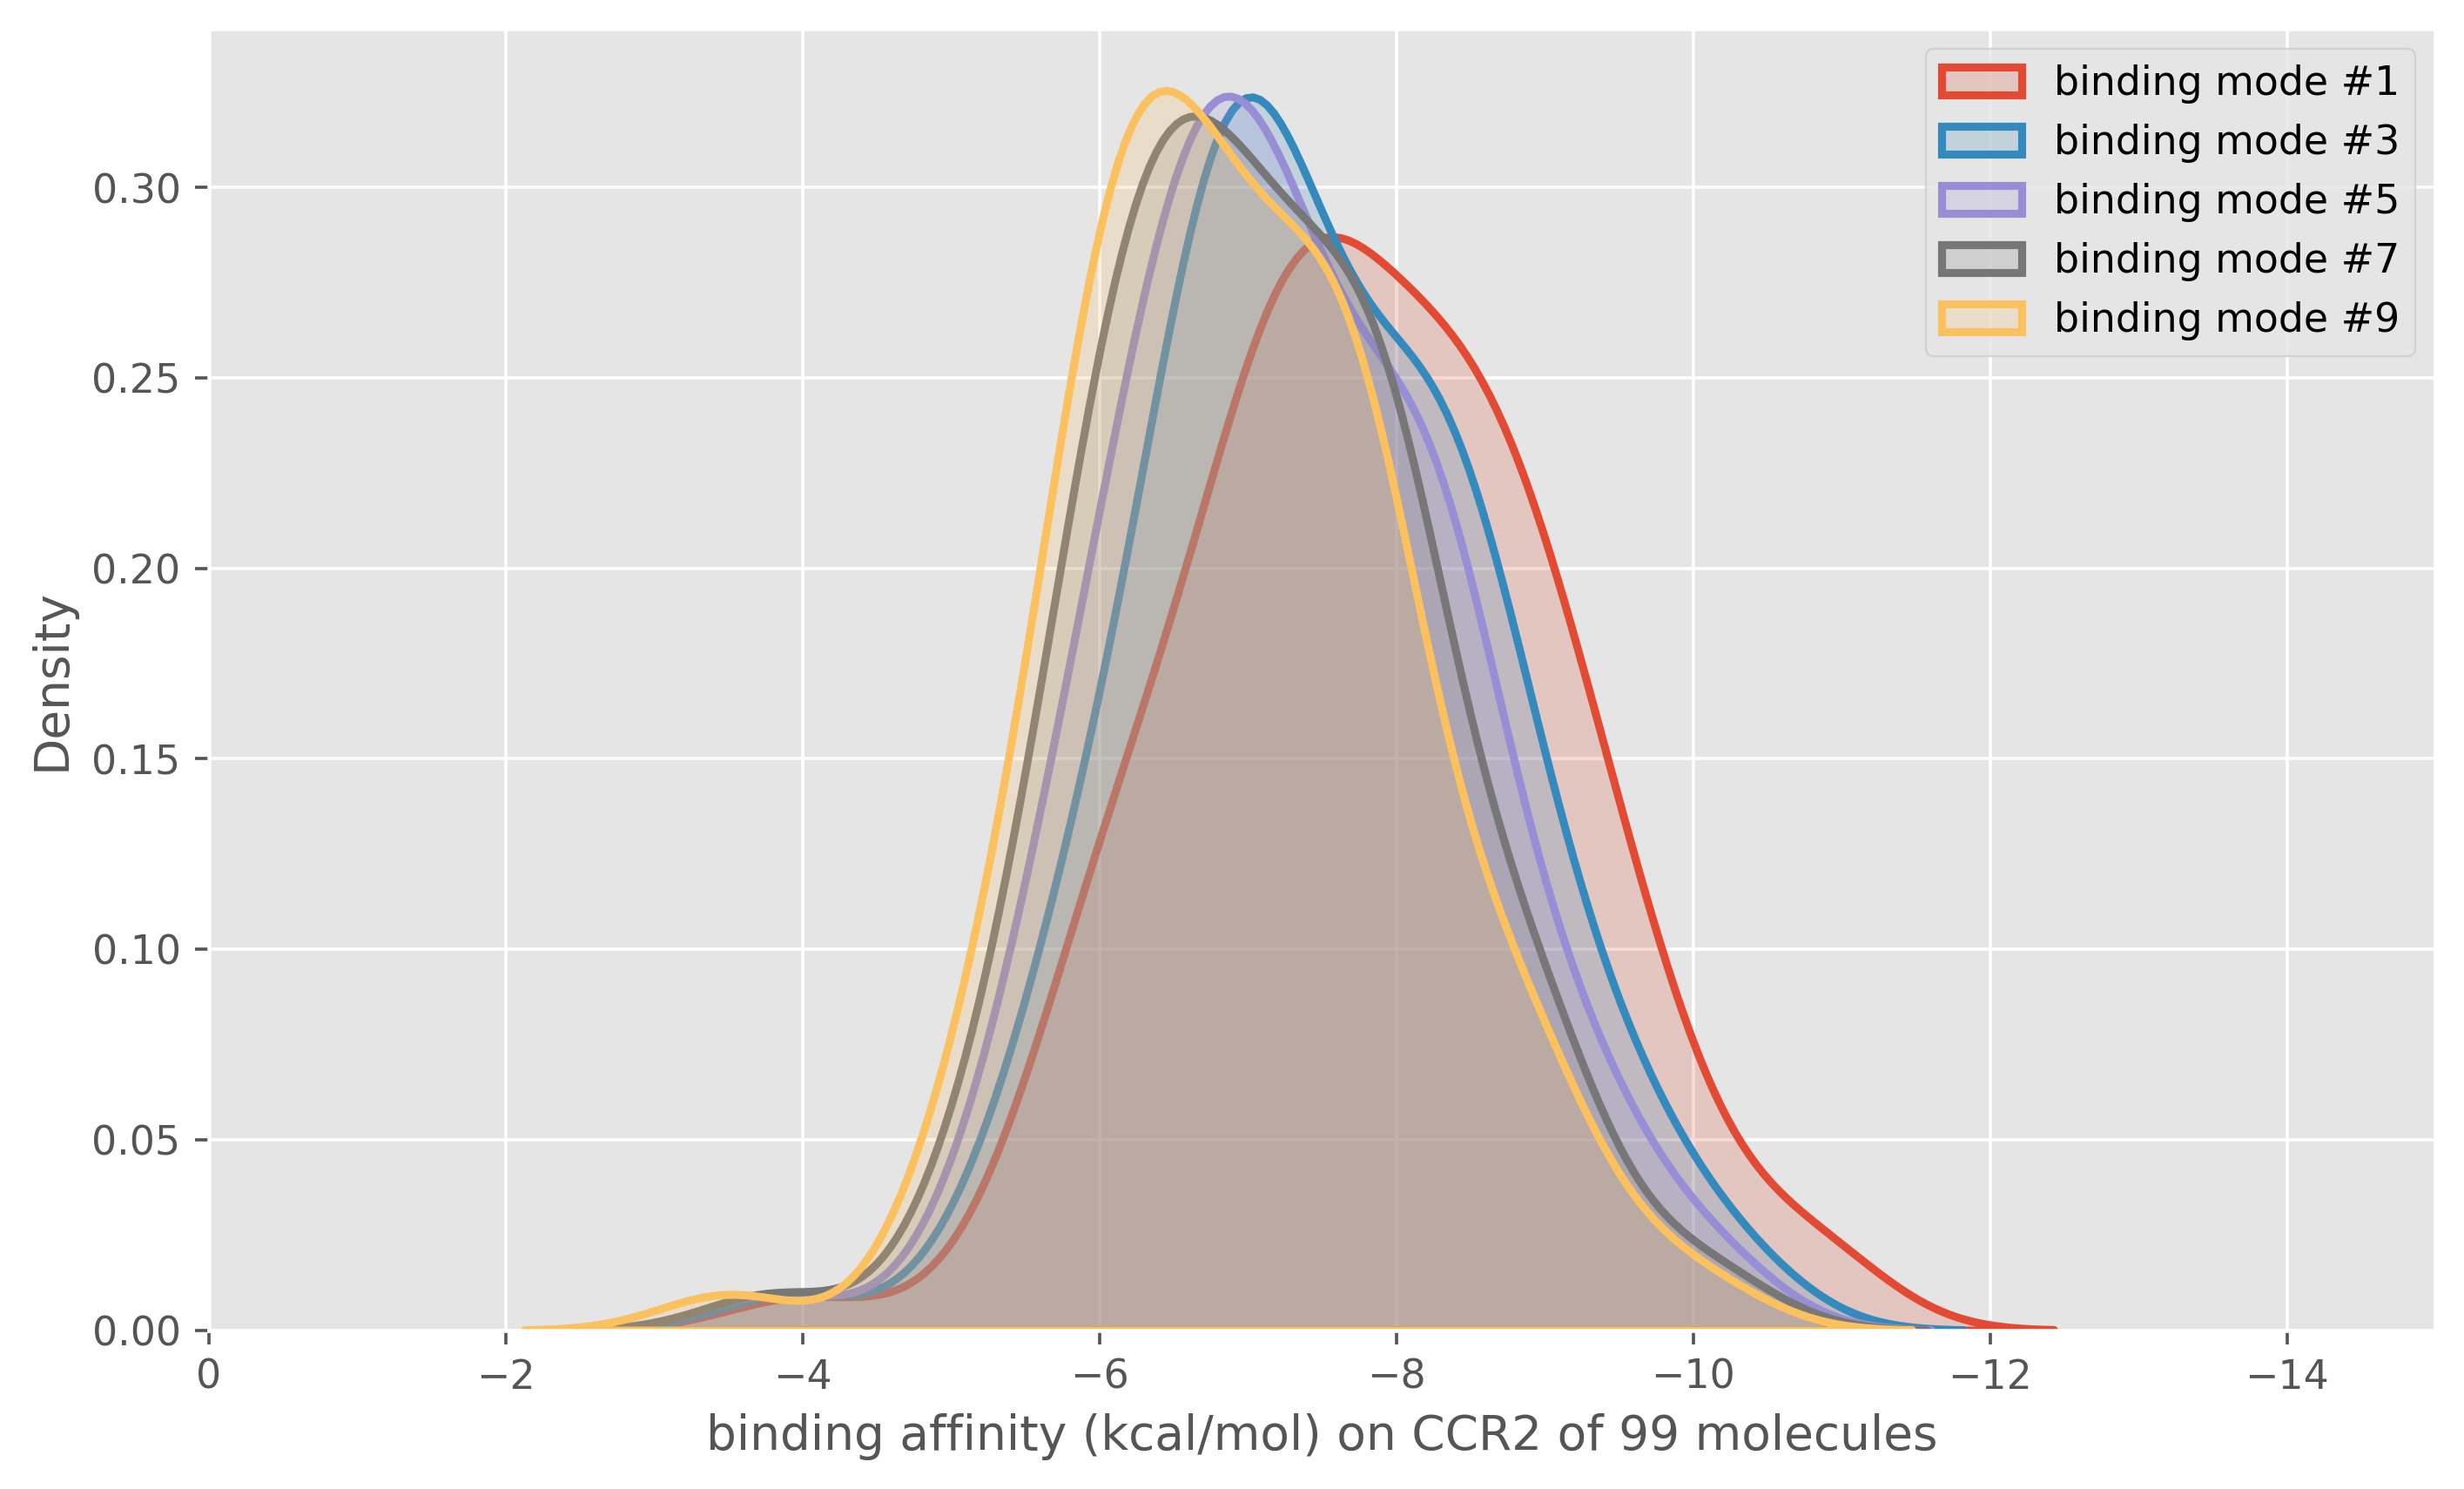

In [9]:
plt.figure(figsize=(10, 6), dpi=330)

sns.kdeplot(data=logs_ccr2["affin_kcal_mol-1_1"], linewidth=2, label="binding mode #1", fill=True, alpha=.2)
sns.kdeplot(data=logs_ccr2["affin_kcal_mol-1_3"], linewidth=2, label="binding mode #3", fill=True, alpha=.2)
sns.kdeplot(data=logs_ccr2["affin_kcal_mol-1_5"], linewidth=2, label="binding mode #5", fill=True, alpha=.2)
sns.kdeplot(data=logs_ccr2["affin_kcal_mol-1_7"], linewidth=2, label="binding mode #7", fill=True, alpha=.2)
sns.kdeplot(data=logs_ccr2["affin_kcal_mol-1_9"], linewidth=2, label="binding mode #9", fill=True, alpha=.2)

plt.xlim(0, -15)
plt.xlabel(f"binding affinity (kcal/mol) on CCR2 of {total_molecules} molecules")
plt.legend()
plt.show()

# Comparison
## Best binding mode

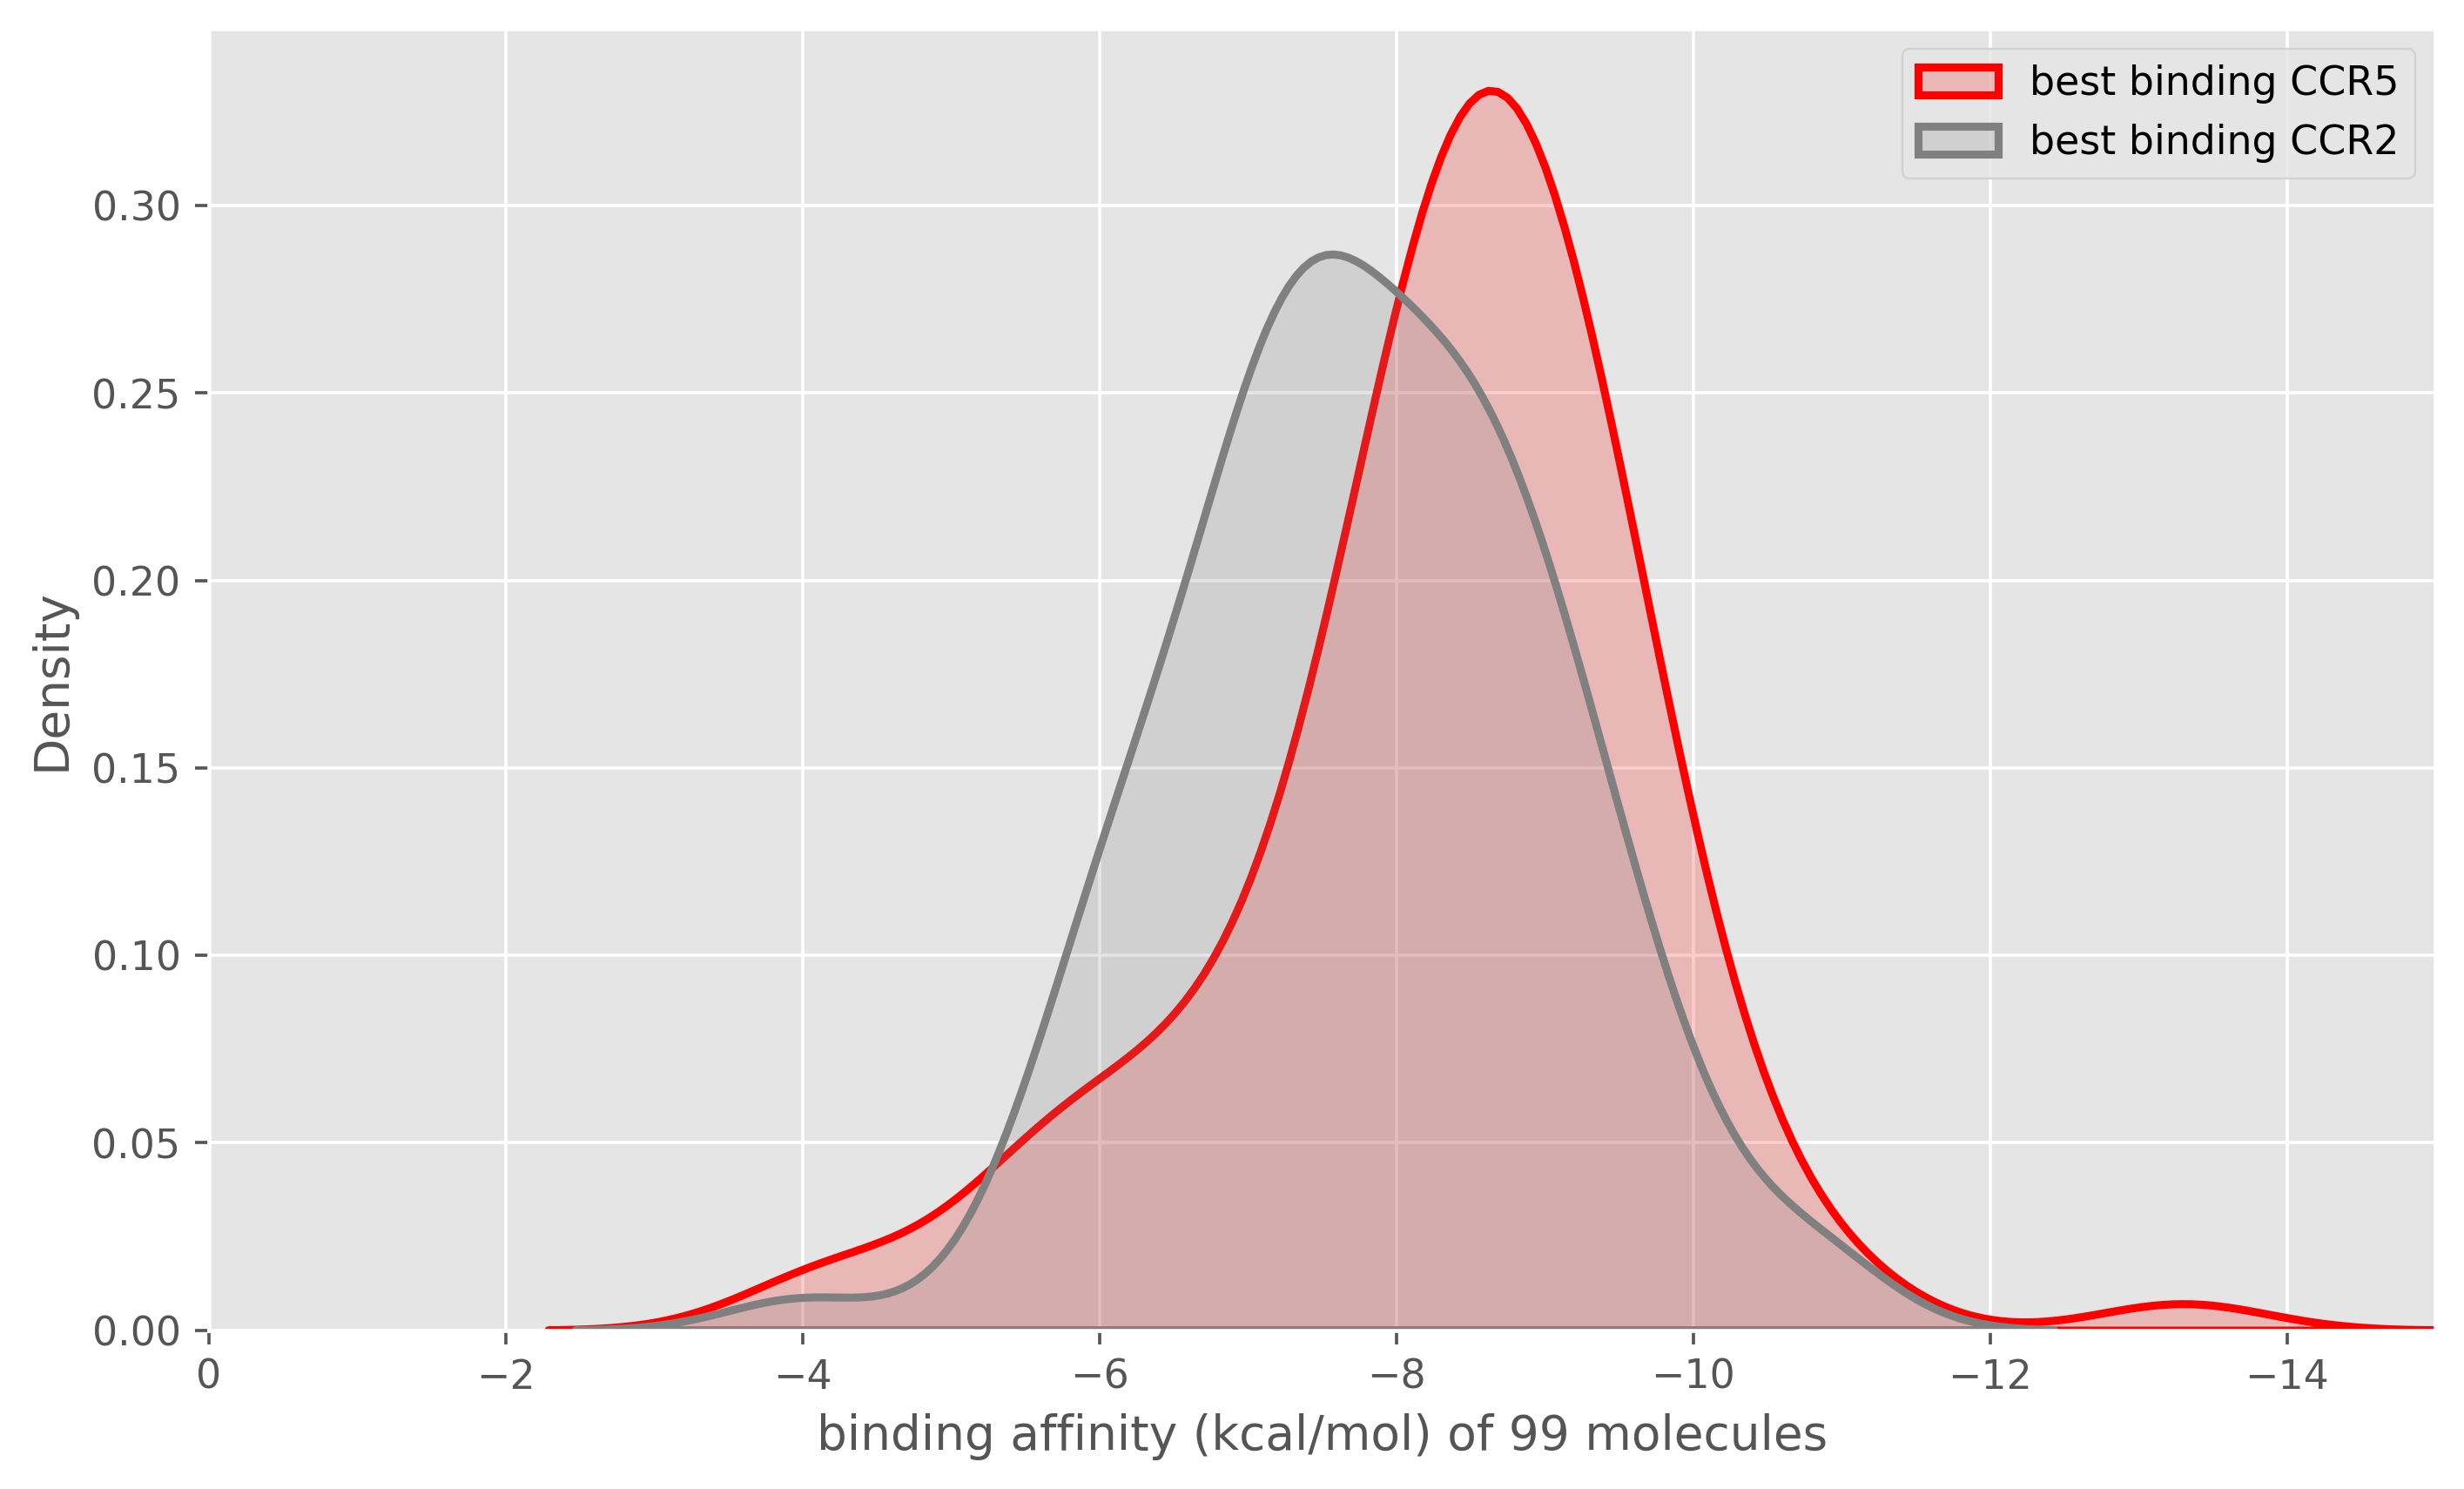

In [10]:
plt.figure(figsize=(10, 6), dpi=330)

sns.kdeplot(data=logs_ccr5["affin_kcal_mol-1_1"], linewidth=2, label="best binding CCR5", fill=True, alpha=.2, color="red")
sns.kdeplot(data=logs_ccr2["affin_kcal_mol-1_1"], linewidth=2, label="best binding CCR2", fill=True, alpha=.2, color="grey")

plt.xlim(0, -15)
plt.xlabel(f"binding affinity (kcal/mol) of {total_molecules} molecules")
plt.legend()
plt.show()

## Correlation of binding affinity

<Figure size 3300x3300 with 0 Axes>

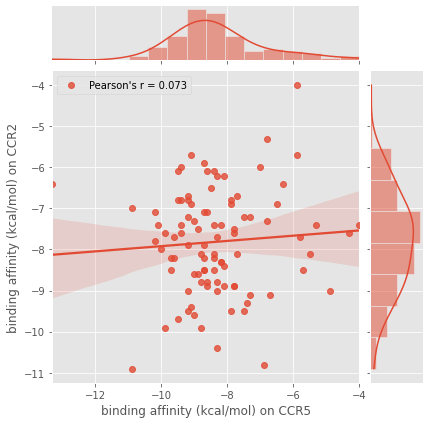

In [38]:
plt.figure(figsize=(10, 10), dpi=330)

x = logs_ccr5["affin_kcal_mol-1_1"][:94]
y = logs_ccr2["affin_kcal_mol-1_1"]
r = stats.pearsonr(x, y)[0]

sns.jointplot(x, y, kind="reg", label=f"Pearson's r = {round(r, 3)}")

plt.xlabel(f"binding affinity (kcal/mol) on CCR5")
plt.ylabel(f"binding affinity (kcal/mol) on CCR2")
plt.legend()
plt.show()